<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/ANN_on_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [4]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

KeyboardInterrupt: 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = "/content/dataset/images/train"
test_dir = "/content/dataset/images/test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,  # Use a small batch size to reduce memory usage
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [4]:
import numpy as np

In [5]:
X_train = []
y_train = []

for _ in range(len(train_generator)):
    imgs, labels = next(train_generator)
    X_train.extend(imgs)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
X_train.shape


(28821, 64, 64, 3)

In [7]:
X_test = []
y_test = []
for _ in range(len(test_generator)):
    imgs, labels = next(test_generator)
    X_test.extend(imgs)
    y_test.extend(labels)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
X_test.shape

(7066, 64, 64, 3)

In [9]:
y_train.shape

(28821, 7)

In [10]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([0., 0., 0., 0., 0.], dtype=float32)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
classes = ["angry","disgust","fear","happy","neutral","sad","surprise"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    # Convert y[index] to an integer before using it as an index for classes
    plt.xlabel(classes[int(y[index])]) # Corrected line: using int() to convert to integer

In [15]:
import matplotlib.pyplot as plt

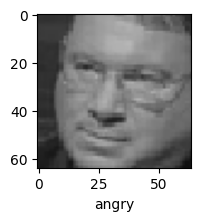

In [16]:
plot_sample(X_train, y_train, 0)

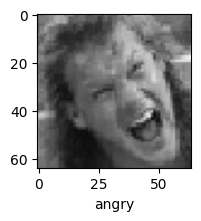

In [17]:
plot_sample(X_train, y_train, 1)

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [27]:
ann = models.Sequential([
        layers.Flatten(input_shape=(64,64,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(7, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 123s 136ms/step - accuracy: 0.8543 - loss: 0.8457
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 143s 137ms/step - accuracy: 0.8591 - loss: 0.4157
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 142s 137ms/step - accuracy: 0.8588 - loss: 0.4108
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 142s 137ms/step - accuracy: 0.8604 - loss: 0.4066
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 131s 145ms/step - accuracy: 0.8583 - loss: 0.4097


In [30]:
_, accuracy = ann.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 85.72
